# **Project 3: YouTube Viewership Predictions**
a homework assignment for CIS 545: Big Data Analytics

This homework will give you a hands on experience with machine learning with sklearn and scalable machine learning with Spark ML!

Since most of us are isolated in the comfort and safety of our homes, our biggest source of entertainment is through online media platforms like Netflix, Prime Video, Hulu and YouTube. We will be exploring what makes videos successful on these platforms focusing on YouTube's data.

### Libraries and Setup Jargon!
Run the following  cells to setup the notebook. When prompted for a selection, select the number that is associated with java 8

In [ ]:
! sudo apt install openjdk-8-jdk
! sudo update-alternatives --config java

Reading package lists... Done
Building dependency tree       
Reading state information... Done
openjdk-8-jdk is already the newest version (8u275-b01-0ubuntu1~18.04).
0 upgraded, 0 newly installed, 0 to remove and 42 not upgraded.
There are 2 choices for the alternative java (providing /usr/bin/java).

  Selection    Path                                            Priority   Status
------------------------------------------------------------
* 0            /usr/lib/jvm/java-11-openjdk-amd64/bin/java      1111      auto mode
  1            /usr/lib/jvm/java-11-openjdk-amd64/bin/java      1111      manual mode
  2            /usr/lib/jvm/java-8-openjdk-amd64/jre/bin/java   1081      manual mode

Press <enter> to keep the current choice[*], or type selection number: 


In [ ]:
%%capture
!pip3 install penngrader

from penngrader.grader import *

VERY IMPORTANT : Enter your **8 digit Penn ID** in the student id field below

PLEASE NOTE: There are some questions, for example making plots, that do not have test cases. All questions without an autograder attached will be manually graded. 

In [ ]:
!pip3 install pandas==1.0.5

In [ ]:
# make sure that this cell prints True! Otherwise you may have forgotten to
# restart your runtime after running the cell above
import pandas as pd
print(pd.__version__ == '1.0.5')

True


In [ ]:
#PLEASE ENSURE YOUR PENN-ID IS ENTERED CORRECTLY. IF NOT, THE AUTOGRADER WON'T KNOW WHO 
#TO ASSIGN POINTS TO YOU IN OUR BACKEND
STUDENT_ID = 65606672

In [ ]:
grader = PennGrader(homework_id = 'CIS545_Fall_2020_HW4', student_id = STUDENT_ID)

PennGrader initialized with Student ID: 65606672

Make sure this correct or we will not be able to store your grade


In [ ]:
import numpy as np 
import json
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
from datetime import datetime
import glob
import seaborn as sns
import re
import os
import statistics
import random
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from pyspark.ml.feature import PCA

In [ ]:
## If boto3 not already installed uncomment the following:
!pip3 install boto3

In [ ]:
import boto3
from botocore import UNSIGNED

from botocore.config import Config

s3 = boto3.resource('s3', config=Config(signature_version=UNSIGNED))
s3.Bucket('penn-cis545-files').download_file('youtube_data.zip', 'youtube_data.zip')

!unzip /content/youtube_data.zip

Archive:  /content/youtube_data.zip
replace youtube_data/IN_category_id.json? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: youtube_data/IN_category_id.json  
  inflating: __MACOSX/youtube_data/._IN_category_id.json  
  inflating: youtube_data/.DS_Store  
  inflating: __MACOSX/youtube_data/._.DS_Store  
  inflating: youtube_data/FR_category_id.json  
  inflating: __MACOSX/youtube_data/._FR_category_id.json  
  inflating: youtube_data/INvideos.csv  
  inflating: __MACOSX/youtube_data/._INvideos.csv  
  inflating: youtube_data/CAvideos.csv  
  inflating: __MACOSX/youtube_data/._CAvideos.csv  
  inflating: youtube_data/FRvideos.csv  
  inflating: __MACOSX/youtube_data/._FRvideos.csv  
  inflating: youtube_data/CA_category_id.json  
  inflating: __MACOSX/youtube_data/._CA_category_id.json  
  inflating: youtube_data/US_category_id.json  
  inflating: __MACOSX/youtube_data/._US_category_id.json  
  inflating: youtube_data/USvideos.csv  
  inflating: __MACOSX/youtube_data/._USvideos.c

# Section 1 : Machine Learning with Sklearn (45 points)

## 1.1 Data loading and Preprocessing (5 pts)

The dataset we will be using is a daily record of the top trending YouTube videos.

To determine the year’s top-trending videos, YouTube uses a combination of factors including measuring users interactions (number of views, shares, comments and likes). "Note that they’re not the most-viewed videos overall for the calendar year”. Top performers on the YouTube trending list are music videos (such as the famously viral “[Gangnam Style](https://www.youtube.com/watch?v=9bZkp7q19f0)”), celebrity and/or reality TV performances, and the random dude-with-a-camera viral videos that YouTube is well-known for.

This dataset includes several months (and counting) of data on daily trending YouTube videos. Data is included for numerous countries, with up to 200 listed trending videos per day.

Each region’s data is in a separate file. Data includes:

*   Video Title
*   Channel title
*   Publish time
*   Tags
*   Views
*   Likes
*   Dislikes
*   Description
*   Comment count

The data also includes a category\_id field, which varies between regions. To retrieve the categories for a specific video, find it in the associated JSON. One such file is included for each of the five regions in the dataset.

For more information on specific columns in the dataset refer to the column metadata.



#### 1.1.1: Combining Multiple CSV's. (2 pts.)

There are multiple csv files in the dataset, each corresponding to a specific country. As a first step you need to read them and combine these csv files into a single dataframe. Use 'video_id' as your index.

While combining them, you also need to create a column for "country" and fill it in the final dataframe. The country name can be extracted using the filename itself.

Name your dataframe "combined_data".

In [ ]:
# Import all the csv files
files = [i for i in glob.glob('/content/youtube_data/*.csv'.format('csv'))]
sorted(files)

['/content/youtube_data/CAvideos.csv',
 '/content/youtube_data/FRvideos.csv',
 '/content/youtube_data/INvideos.csv',
 '/content/youtube_data/USvideos.csv']

In [ ]:
# TODO Combine all into a single dataframe "combined_data" and add a 'country' column. 
all_dataframes = list()
for csv in files:
  current_df = pd.read_csv(csv)
  current_df["country"] = csv.split("/")[-1][:2]
  all_dataframes.append(current_df)

combined_data = pd.concat(all_dataframes)

In [ ]:
#Setting the index to video_id
combined_data.set_index("video_id", inplace=True)

In [ ]:
# Grader cell 
grader.grade('check_combined_dataframe', (combined_data.shape))

Correct! You earned 1/1 points. You are a star!

Your submission has been successfully recorded in the gradebook.


In [ ]:
# Grader cell 
grader.grade('check_country',(combined_data.country))

Correct! You earned 1/1 points. You are a star!

Your submission has been successfully recorded in the gradebook.


#### 1.1.2: Map category Id's to categories (2 pts)

Read the category_id.json file and map the category_id's in the dataframe to the category name.

Use json.load to read in the data in the json file as a python dictionary and then map the category id given in the dataframe to category name from the json file. (Hint: the US json is likely the most comprehensive reference)




In [ ]:
#Converting category_id to str
combined_data['category_id'] = combined_data['category_id'].astype(str)

In [ ]:
#Return dict
US_category_id = json.load(open('/content/youtube_data/US_category_id.json'))

In [ ]:
#Creating our mapping dictionary
mapper = dict()

for i in np.arange(len(US_category_id["items"])):

  #Get ID
  id = US_category_id["items"][i]["id"]

  #Get Genre
  genre = US_category_id["items"][i]["snippet"]["title"]

  mapper[id] = genre

In [ ]:
#Creating the "category" column
combined_data["category"] = combined_data["category_id"].apply(lambda x: mapper[x])

In [ ]:
# Grader Cell 2 pts
grader.grade('check_category_mapping',(combined_data.category))

Correct! You earned 2/2 points. You are a star!

Your submission has been successfully recorded in the gradebook.


#### 1.1.3: Fix datetime format and remove rows with NA's (1 pt)

The 'publish_time' and 'trending_date' features are not in a unix datetime format, so use pandas to_datetime() to convert it into the right format.

After that is done remove all the rows which have NA's in them.

In [ ]:
# Your code goes here
combined_data['trending_date'] = pd.to_datetime(combined_data["trending_date"], format='%y.%d.%m')
combined_data['publish_time'] = pd.to_datetime(combined_data["publish_time"])

# Code to remove NA's
combined_data.dropna(inplace=True)

In [ ]:
# Grader cell 1 pt
grader.grade('validate_na',(combined_data.shape))

Correct! You earned 1/1 points. You are a star!

Your submission has been successfully recorded in the gradebook.


## 1.2 EDA and Feature Engineering (20 pts)


**EDA:** Exploratory data analysis is an approach to analyzing data sets to summarize their main characteristics, often with visual methods. A statistical model can be used or not, but primarily EDA is for seeing what the data can tell us beyond the formal modeling or hypothesis testing task.

**Feature Engineering:** Feature engineering is the process of using domain knowledge to extract features from raw data via data mining techniques. These new features can be used to improve the performance of machine learning algorithms. Features are also commonly referred to as covariates, predictors, or put more simply, new columns in our df.

#### 1.2.1: Mean, standard deviation, min and max. (1 pt)

Compute some simple statistics like mean, standard deviation, min and max for each of the numerical features in the dataset and store them into lists in order [views, likes, dislikes, comment_count]

means = [views_mean, likes_mean, dislikes_mean, comment_count_mean] and similarly for mins, maxs and stds

In [ ]:
# Your code goes here
maxs = [max(combined_data["views"]), max(combined_data["likes"]), max(combined_data["dislikes"]), max(combined_data["comment_count"])]
mins = [min(combined_data["views"]), min(combined_data["likes"]), min(combined_data["dislikes"]), min(combined_data["comment_count"])]
stds = [statistics.stdev(combined_data["views"]), statistics.stdev(combined_data["likes"]), statistics.stdev(combined_data["dislikes"]), statistics.stdev(combined_data["comment_count"])]
means = [np.mean(combined_data["views"]), np.mean(combined_data["likes"]), np.mean(combined_data["dislikes"]), np.mean(combined_data["comment_count"])]

In [ ]:
# Grader cell 1 pt
grader.grade('check_min_max_mean_std',([maxs, mins, stds, means]))


Correct! You earned 1/1 points. You are a star!

Your submission has been successfully recorded in the gradebook.


#### 1.2.2: Rescale features (1 pt)

As you can observe from the above computation, the range of data is really high, to avoid numerical instability issues, rescale the likes, views, dislkes and comment_count to log scale (base e) and store them in the dataframe as likes_log, views_log, dislikes_log and comment_log. Note that log 0 is not defined, hence you can add 1 to each value prior to taking the log.

In [ ]:
# Your code goes here
combined_data['likes_log'] = np.log(combined_data['likes'] + 1)
combined_data['views_log'] = np.log(combined_data['views'] + 1)
combined_data['dislikes_log'] = np.log(combined_data['dislikes'] + 1)
combined_data['comment_log'] = np.log(combined_data['comment_count'] + 1)

In [ ]:
# Grader cell 1 pt
grader.grade('check_feature_rescaling',([np.mean(combined_data['likes_log']),np.mean(combined_data['views_log']),np.mean(combined_data['dislikes_log']),
                                         np.mean(combined_data['comment_log'])]))

Correct! You earned 1/1 points. You are a star!

Your submission has been successfully recorded in the gradebook.


#### 1.2.3: Plot the distribution (2 pt)

Plot the distribution for the newly created log features. They should look like normal distribution curves.

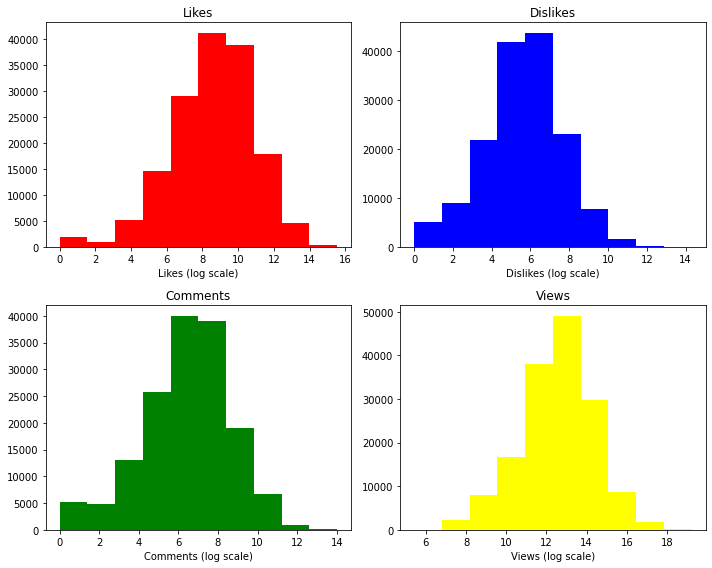

In [ ]:
# Plotting
bins = 10

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
ax0, ax1, ax2, ax3 = axes.flatten()

ax0.hist(combined_data["likes_log"], bins, color="red")
ax0.set_title('Likes')
ax0.set_xlabel('Likes (log scale)')

ax1.hist(combined_data["dislikes_log"], bins, color="blue")
ax1.set_title('Dislikes')
ax1.set_xlabel('Dislikes (log scale)')

ax2.hist(combined_data["comment_log"], bins, color="green")
ax2.set_title('Comments')
ax2.set_xlabel('Comments (log scale)')

ax3.hist(combined_data["views_log"], bins, color="yellow")
ax3.set_title('Views')
ax3.set_xlabel('Views (log scale)')

fig.tight_layout()
plt.show()

#### 1.2.4: Comparing views, likes, dislikes against categories (3 pt)

As a next step, try to gain insights into the data using categories, views, likes and dislikes.

Draw three plots:

1.) How many videos are there for each category?

2.) What is the distribution of views against categories? (Use boxplot and views on log scale)

3.) What is the distribution of dislikes against categories? (Use boxplot and dislikes on log scale)

For extra credit:
You can try to gain more insights into the dataset by drawing interesting plots. Some ideas include:

* How long does a video trend in a country? 
* What are some videos which got popular because they were disliked? 

Think of such interesting things and add here. We will award points based on creativity of the insights that you get.

[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Category'),
 Text(0.5, 1.0, 'Number of uploads per category')]

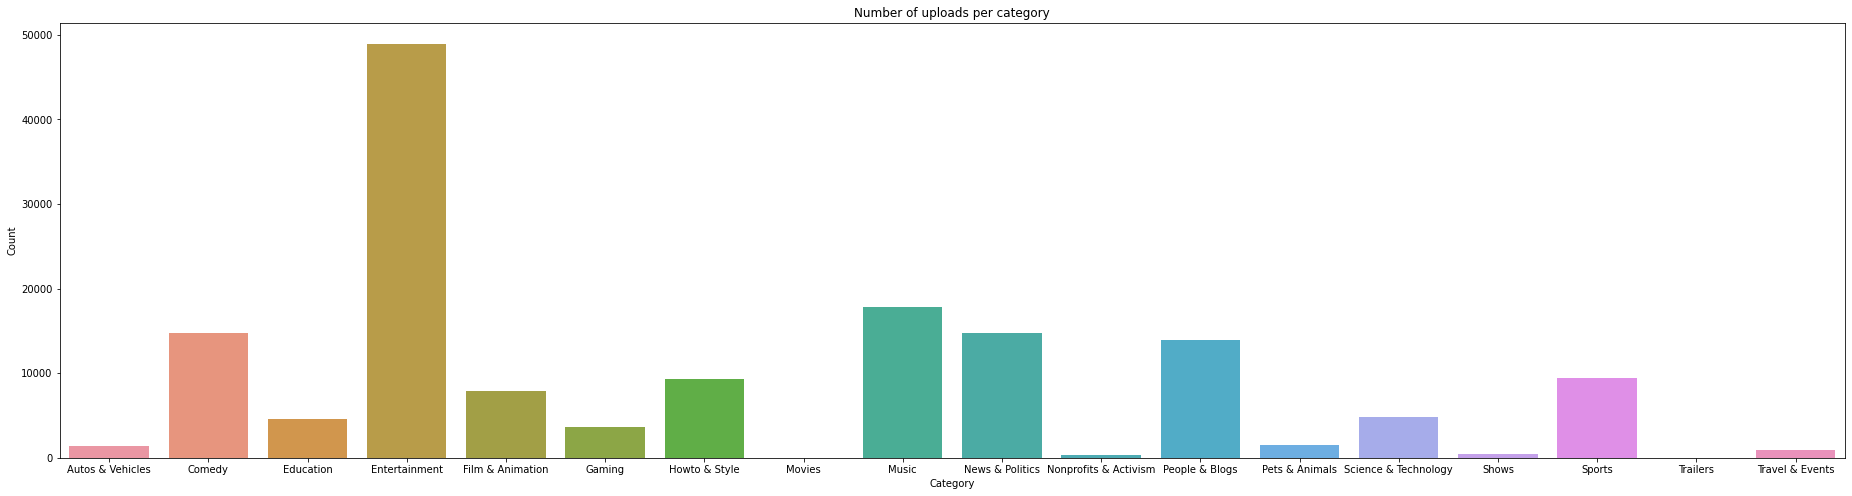

In [ ]:
#PLOT 1: video by category
videos_by_category = combined_data.groupby(by=["category"]).count().reset_index().iloc[:,:2].rename(columns={'trending_date':'count'})

#Plotting
fig = plt.figure(figsize=(32, 8))
ax = sns.barplot(x="category", y="count", data=videos_by_category)
ax.set(xlabel='Category', ylabel='Count', title="Number of uploads per category")

[Text(0, 0.5, 'Views (log scale)'),
 Text(0.5, 0, 'Category'),
 Text(0.5, 1.0, 'Views (log scale) per category')]

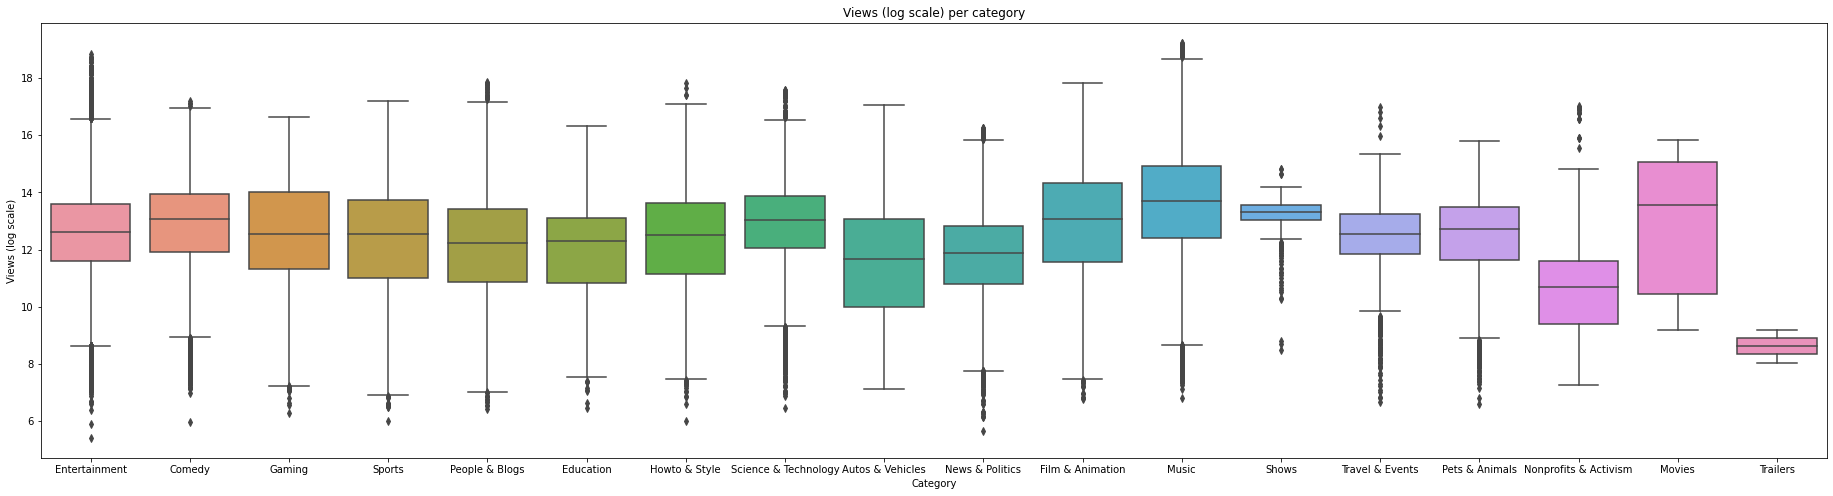

In [ ]:
#PLOT 2: distribution of views against categories
fig = plt.figure(figsize=(32, 8))
ax = sns.boxplot(x="category", y="views_log", data=combined_data)
ax.set(xlabel='Category', ylabel='Views (log scale)', title="Views (log scale) per category")

[Text(0, 0.5, 'Dislikes (log scale)'),
 Text(0.5, 0, 'Category'),
 Text(0.5, 1.0, 'Dislikes (log scale) per category')]

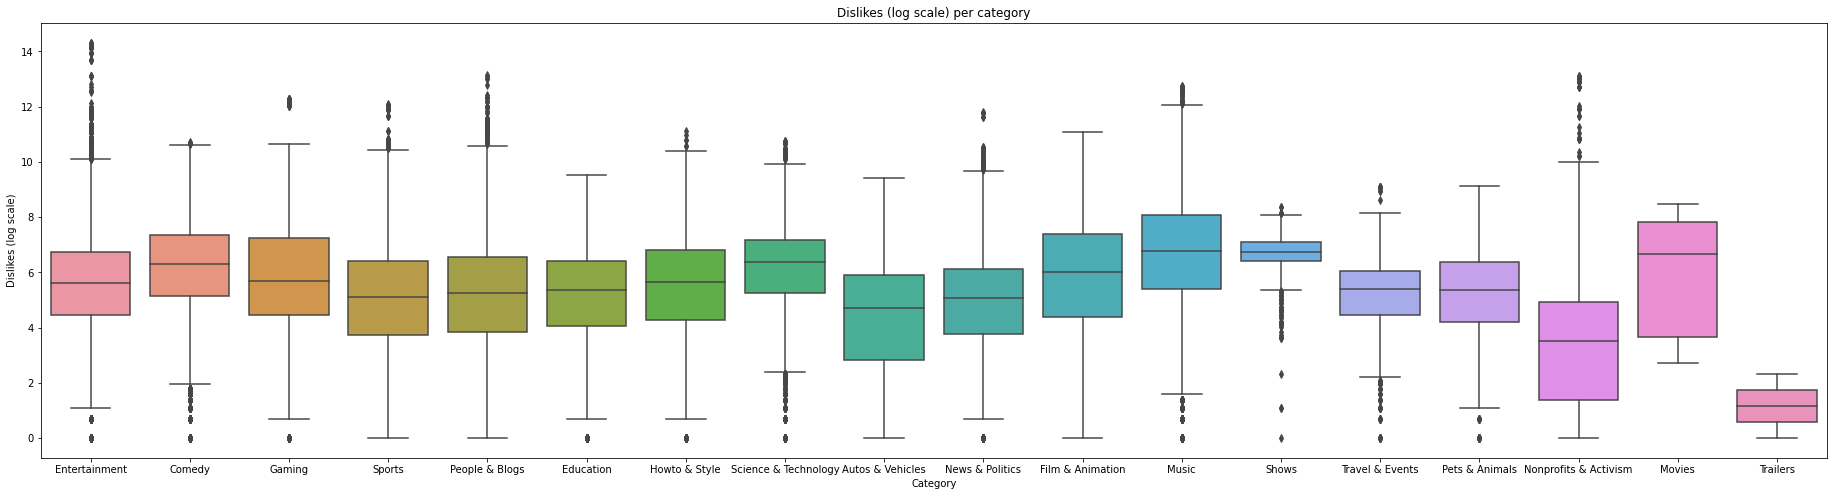

In [ ]:
#PLOT 3: distribution of dislikes against categories
fig = plt.figure(figsize=(32, 8))
ax = sns.boxplot(x="category", y="dislikes_log", data=combined_data)
ax.set(xlabel='Category', ylabel='Dislikes (log scale)', title="Dislikes (log scale) per category")

#### 1.2.4: Extra Credit

Text(0.5, 1.0, 'Videos with the highest ratio of dislikes to likes')

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48169 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53444 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49548 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45380 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45800 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 48169 missing from current font.
  font.set_

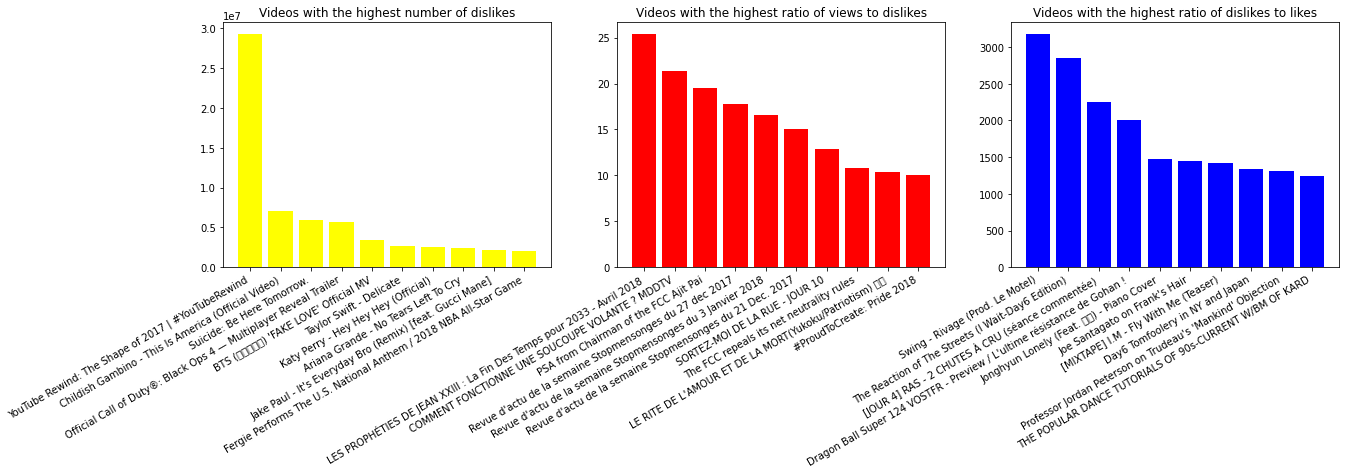

In [ ]:
#PLOT 4: Videos that got popular due to dislikes

#Creating a dataframe of videos that are disliked and adding columns
disliked_videos = combined_data.groupby(by=["title"]).sum().sort_values(by=["dislikes"], ascending=False).reset_index()
disliked_videos["dislike_ratio"] = disliked_videos["likes"] / disliked_videos["dislikes"]
disliked_videos["hate_percentage"] = disliked_videos["dislikes"] / disliked_videos["views"] * 100
disliked_videos["like_percentage"] = disliked_videos["likes"] / disliked_videos["views"] * 100
disliked_data = disliked_videos[["title","views","dislikes","likes","dislike_ratio","hate_percentage","like_percentage"]]

#Creating sub DFs for plotting
most_disliked = disliked_data.sort_values(by=["dislikes"], ascending=False).head(10)
most_percentage_of_haters = disliked_data.sort_values(by=["hate_percentage"], ascending=False).head(10)
most_dislike_ratio = disliked_data.sort_values(by=["dislike_ratio"], ascending=False)
most_dislike_ratio = most_dislike_ratio[most_dislike_ratio["dislikes"] != 0]
most_dislike_ratio = most_dislike_ratio.head(10)

#Plotting
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))
ax0, ax1, ax2 = axes.flatten()
plt.gcf().autofmt_xdate()

#Most dislikes
ax0.bar(x=most_disliked["title"], height=most_disliked["dislikes"], color="yellow")
ax0.set_title('Videos with the highest number of dislikes')

#Most percentage of haters
ax1.bar(x=most_percentage_of_haters["title"], height=most_percentage_of_haters["hate_percentage"], color="red")
ax1.set_title('Videos with the highest ratio of views to dislikes')

#Most dislikes
ax2.bar(x=most_dislike_ratio["title"], height=most_dislike_ratio["dislike_ratio"], color="blue")
ax2.set_title('Videos with the highest ratio of dislikes to likes')


It's interesting to see how the "hate" for each video on YouTube is relative. In the first plot, we see that the most disliked video in our dataset is the YouTube rewind of 2017. However, this vide ohad twice as many likes as dislikes. Therefore, just because it has the highest number of dislikes, doesn't exactly mean its the most hated video on youtube. In the second graph we see the precentage of people who clicked on the video and decided that they were going to dislike it. The highest video here had 25% of total viewers click the dislike button, so this could be an argument for most hated video on YouTube. Finally, we have a graph depicting the videos with the highest ratio of dislikes to likes. Here, we see that "Swing - Rivage (prod Le Motel), had over 3000x the number of dislikes as likes. That's a pretty disliked video!

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


Text(2018-02-18 00:00:00, -1, 'Trump announces 25% tariffs certain Chinese goods')

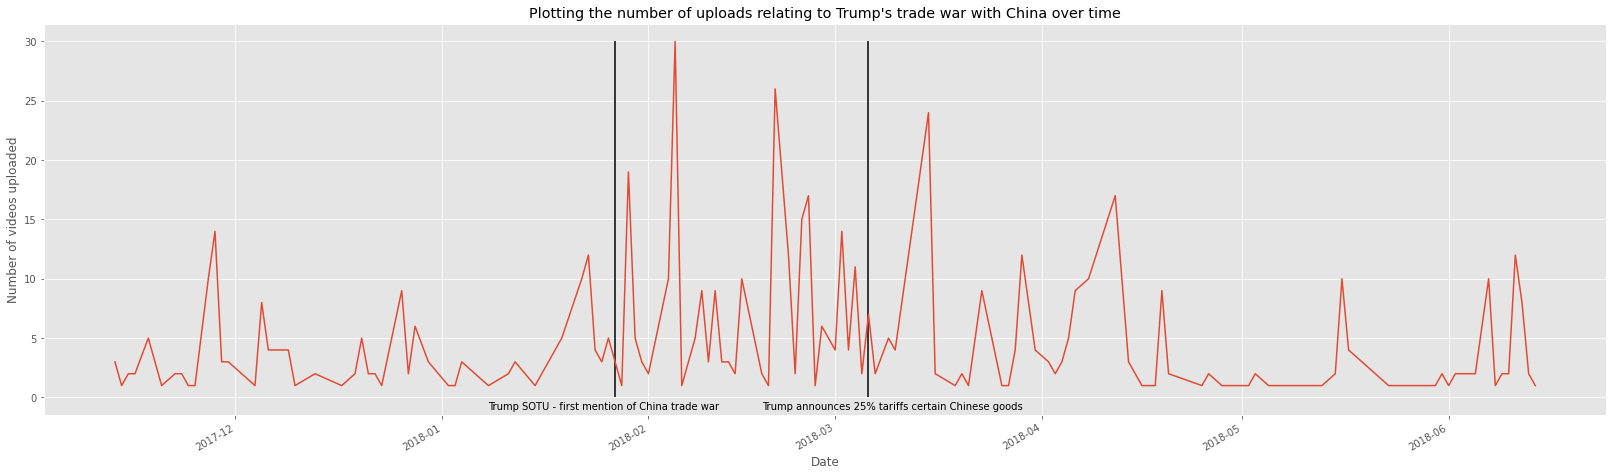

In [ ]:
#PLOT 5: Plotting  the frequency of uploads that contain words relating to Trump's trade war with China over time

import re
#Creating the key_words_video df which contains all the video that hav the following key words in either the title or the tags
key_words = ["Trade", "trade war", "china trade", "trade deal", "tariff"]

#Creating the dataframe
key_word_videos = combined_data[np.logical_or(combined_data["title"].str.contains('|'.join(key_words), case=False), combined_data["description"].str.contains('|'.join(key_words), case=False))]
key_word_videos["publish_date"] = key_word_videos["publish_time"].apply(lambda x: x.date())

#Creating a pivot table to graph uploads by date
key_words_pivoted = key_word_videos.groupby(by=["publish_date"]).count().reset_index().iloc[:,:2].rename(columns={"trending_date":"count"})

#Plotting the data
plt.style.use('ggplot')
fig = plt.figure(figsize=(28, 8))
plt.plot(key_words_pivoted["publish_date"][1:], key_words_pivoted["count"][1:])
plt.gcf().autofmt_xdate()
plt.xlabel('Date')
plt.ylabel('Number of videos uploaded')
plt.title('Plotting the number of uploads relating to Trump\'s trade war with China over time')

#Trump's state of the union address
plt.vlines(x=datetime(2018, 1, 27), ymin=0, ymax=30)
plt.text(x=datetime(2018, 1, 8), y=-1, s="Trump SOTU - first mention of China trade war")

#Trump's announces tariffs
plt.vlines(x=datetime(2018, 3, 6), ymin=0, ymax=30)
plt.text(x=datetime(2018, 2, 18), y=-1, s="Trump announces 25% tariffs certain Chinese goods")

Here we see some pretty obvious spikes in the YouTube uploads that had any semantic conection to Trump's trade war with China just after he first mentions in on a major platform (his State of the Union) and just after he officially signs tariffs into law

#### 1.2.5: Feature Engineering (8 pts)



##### a. Processing tags (1 pt)

The feature tags in the dataset has a delimiter, use that delimiter to count the number of tags, create a feature called num_tags and add that to the dataset.

In [ ]:
#Creating the "num_tags" column
combined_data["num_tags"] = combined_data["tags"].apply(lambda x: len(x.split("|")))

##### b. Processing description and title (2 pts.)

Compute the length of description and title and add them as features to the dataset

In [ ]:
# Your code goes here
combined_data["desc_len"] = combined_data["description"].apply(lambda x: len(x))

In [ ]:
# Your code goes here
combined_data["len_title"] = combined_data["title"].apply(lambda x: len(x))

In [ ]:
# Grader cell 3 pts.
grader.grade('check_tags_title_description',([combined_data['num_tags'].describe(),combined_data['desc_len'].describe(),combined_data['len_title'].describe()]))

Correct! You earned 3/3 points. You are a star!

Your submission has been successfully recorded in the gradebook.


##### c. Processing publish_time. (4 pts.)


Split 'publish_time' feature into three parts time, date, and weekday, where time will contain the time component of the original feature and date and weekday will store the corresponding date and weekday number respectively. Start with 1 for Monday and end with 7 for Sunday.

In [ ]:
#Separating out time, date, and weekday
combined_data['publish_date'] = combined_data["publish_time"].apply(lambda x: x.date())
combined_data['publish_weekday'] = combined_data["publish_time"].apply(lambda x : x.timetuple()[6] + 1)
combined_data['publish_time'] = combined_data["publish_time"].apply(lambda x: x.time())

In [ ]:
#Creating the random_index variable
random_index = random.randint(0,combined_data.shape[0]-1)

In [ ]:
# Grader cell 4 pts
grader.grade('check_date_time_processing',([combined_data['publish_time'].iloc[random_index],combined_data['publish_date'].iloc[random_index],sorted(list(combined_data["publish_weekday"].value_counts()))]))

Correct! You earned 4/4 points. You are a star!

Your submission has been successfully recorded in the gradebook.


##### d. Number of videos per weekday (1 pt)

Compute the number of videos published per day of the week. Which day of the week do people publish most videos? Make a visualization demonstrating the result.

[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Weekdays'),
 Text(0.5, 1.0, 'Number of videos published each weekday')]

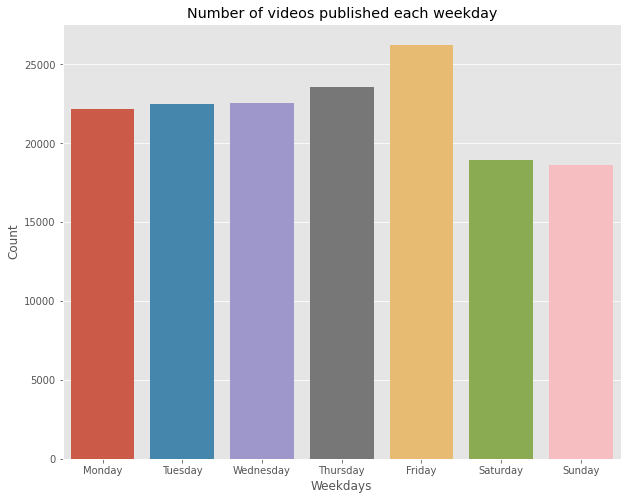

In [ ]:
#Creating the groupby table
videos_per_weekday = combined_data.groupby(by=["publish_weekday"]).count().reset_index().iloc[:,:2].rename(columns={"trending_date":"count", "publish_weekday":"weekday"})

#Creating a mapping dict to add weekday names
weekdays = {1:"Monday",
            2: "Tuesday",
            3: "Wednesday",
            4: "Thursday",
            5: "Friday",
            6: "Saturday",
            7: "Sunday"}

#Modifying the DF
videos_per_weekday["weekday"] = videos_per_weekday["weekday"].apply(lambda x: weekdays[x])

#Plotting
fig = plt.figure(figsize=(10, 8))
ax = sns.barplot(x="weekday", y="count", data=videos_per_weekday)
ax.set(xlabel='Weekdays', ylabel='Count', title="Number of videos published each weekday")

#### 1.2.6: Dropping irrelevant non numeric columns (1 pt.)

Drop all the columns that are non-numeric as we have processed them and stored the information captured in them in the dataset as numbers. Note that a few key columns are non-numeric but should be kept in the dataframe:

comments_disabled, ratings_disabled, video_error_or_removed, country

Also drop original views, like, comments and dislikes as you have processed them as logs and stored them as separate feature. 

In [ ]:
#Dropping non-numeric
combined_data.drop(columns=["title","channel_title","tags","views","likes","comment_count","dislikes","thumbnail_link","description","category","trending_date","publish_time","publish_date"], inplace = True)

#### 1.2.7: Convert categorical features in the dataset into one hot vectors. (3 pts)

There are three categorical features remaining in the dataset, identify them and convert them into one hot vectors. Be sure that when you one hot encode, the original column is replaced.

In [ ]:
#Converting datatype
combined_data.publish_weekday = combined_data.publish_weekday.astype('category')
combined_data.country = combined_data.country.astype('category')

In [ ]:
#One-hot encoding categoerical features
dummies = pd.get_dummies(combined_data[['publish_weekday', 'country','category_id']]) #One Hot encding

# Drop the column with original categorical variables
combined_data_ = combined_data.drop(['publish_weekday', 'country','category_id'], axis=1)
combined_data = pd.concat([combined_data_, dummies], axis=1)

In [ ]:
# Grader cell 3 pts.
grader.grade('check_final_df',(combined_data.shape))

Correct! You earned 3/3 points. You are a star!

Your submission has been successfully recorded in the gradebook.


Let's write out the modified data we created to a file so that we can reuse it in Section 2.

In [ ]:
combined_data_sec_2 = combined_data.copy()
combined_data_sec_2.rename(columns = {'views_log':'label'}, inplace = True) 
combined_data_sec_2.to_csv('combined_data.csv')

#### 1.2.8: Split into x and y (1 pt)

Split the data into features and label, in this case the features are anything but views_log and the label is views_log.

In [ ]:
# Your code goes here
label = combined_data["views_log"]
features = combined_data.drop(columns=["views_log"])

In [ ]:
# Grader cell 1 pt
grader.grade('check_x_y_split',([features.shape, label.describe()]))

Correct! You earned 1/1 points. You are a star!

Your submission has been successfully recorded in the gradebook.


## 1.3 : Machine Learning using sklearn (15 pts)

Scikit-learn (formerly scikits.learn and also known as sklearn) is a free software machine learning library for the Python programming language.[3] It features various classification, regression and clustering algorithms including support vector machines, random forests, gradient boosting, k-means and DBSCAN, and is designed to interoperate with the Python numerical and scientific libraries NumPy and SciPy.

You can find the documentation [here](https://scikit-learn.org/stable/modules/classes.html)

Now we will train some machine learning models using sklearn to predict views, rather than predicting views directly we will predict views_log to avoid numerical instability issues

### 1.3.1 : Split data into train and test (1 pt)

Use sklearn's train_test_split library and split data into train and test sets, the split should be 80-20 meaning 80% for training and rest for testing.


In [ ]:
#Splitting the data
x_train, x_test, y_train, y_test = train_test_split(features, label, test_size=0.2)

In [ ]:
# Grader cell 1 pt.
grader.grade('check_data_split',[x_train.shape,x_test.shape,y_train.shape,y_test.shape])

Correct! You earned 1/1 points. You are a star!

Your submission has been successfully recorded in the gradebook.


### 1.3.2: Train Machine Learning Models.

#### 1.3.2.1 Linear Regression (3 pts)

In this step we will train a linear regression model using sklearn. Train using the training data and then make predictions of test, report the mean squared error obtained on both train and test sets.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#Creating the model
reg = LinearRegression().fit(x_train, y_train)

#Creating y_pred values
y_pred = reg.predict(x_test)

#Generating MSE value
mse_test = mean_squared_error(y_test, y_test)

In [ ]:
grader.grade('check_lr', (np.sqrt(mean_squared_error(y_test, y_pred))))

Correct! You earned 3/3 points. You are a star!

Your submission has been successfully recorded in the gradebook.


#### 1.3.2.2  Dimensionality reduction with PCA (6 pts)



##### Step 1: Fitting PCA and explained_variance_ratiio
Use Principal component analysis to reduce number of dimensions of the dataset, as a first step fit a pca model on your train set and then plot the explained_variance_ratio against the number of components to decide the number of components you should keep. (3 pts)

Text(0, 0.5, 'Explained variance')

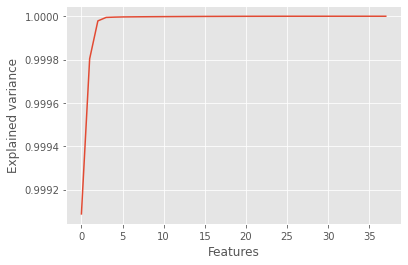

In [ ]:
import numpy as np
from sklearn.decomposition import PCA

# Standardizing the features based on unit variance
#x_train = StandardScaler().fit_transform(x_train)

#Number of features
k = features.shape[1]

#Fit the PCA on the training data
pca = PCA(n_components = k)
x_train_2 = pca.fit_transform(x_train)

#Visualize how much is contributed by the first few terms
pc_vs_variance = np.cumsum(pca.explained_variance_ratio_)

pc_vs_variance
plt.plot(pc_vs_variance)
plt.xlabel('Features')
plt.ylabel('Explained variance')

In [ ]:
#Taking the number of features at the elbow
optimal_k = 5

##### Step 2: Deciding number of components to keep
Use the plot to decide the number of components to keep, choose a number that explains atleast 95% of variance in the dataset. Then fit and transform your pca on training set using the number of components you decided. (1 pts)

**Remember that your pca should be trained on the training set (and transformed here) but only transformed on the test set.**

In [ ]:
#Fit the PCA on the training data
pca = PCA(n_components = optimal_k)
pca.fit(x_train)

# and transform it
x_train_2 = pca.transform(x_train)
x_test_2 = pca.transform(x_test)

In [ ]:
# Grader cell 3 pts.
grader.grade('check_pca', (x_train_2[:50,:]))

Correct! You earned 6/6 points. You are a star!

Your submission has been successfully recorded in the gradebook.


### 1.3.2.3 Random Forest. (10 pts)



##### Step 1: Hyperparameter tuning. 
Use grid search and train a random forest model on the transformed train dataset. Take a look at the sklearn `RandomForestRegressor` documentation and tune the max_depth hyperparameter using grid search. We have already tested the number of estimators hyperparameter for you. Note this section may take a while to run depending on how large your grid is. 

(Hint: refer to the GridSearchCV documentation and do some reading on how the max_depth in a RF model affects the result - while theory may help guide a rough estimate of possible hyperparameters, we can cross validate values using tools like GridSearch.

Our autograder has tiered points for this question depending on your final MSE value but is fairly generous; we are not requiring that you find the **most** optimal value for this hyperparameter but rather demonstrate understanding of grid search optimization. (4 pts)


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
# Only tune the max depth of the trees in the RF hyperparameter
depth = [10, 20]
nEstimator = [140]

#Storing the names of the hyperparameters we want to optimize in a dictionary:
params = {'max_depth': depth, 'n_estimators' : nEstimator}

#Using the RandomizedSearchCV function to optimize the specified paramters
grid = GridSearchCV(RandomForestRegressor(), param_grid = params, scoring = 'neg_mean_squared_error')

#Fitting
grid.fit(x_train_2, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n

In [ ]:
#Get best parameter
best_max_depth = grid.best_params_["max_depth"]
best_max_depth

20

##### Step 2: Fitting RF
Fit the random forest on the training data using the parameters you computed above. Then make predictions on the test set, report the root mean squared error for the test set. (3 pts)

In [ ]:
# Setting up the optimized RF
rf = RandomForestRegressor(max_depth = best_max_depth, n_estimators = 140)

#Fitting the model
fit_rf = rf.fit(x_train, y_train)

#Generating prediction values
y_pred = fit_rf.predict(x_test)

In [ ]:
np.sqrt(mean_squared_error(y_test, y_pred))

0.45534291800100185

In [ ]:
# Grader cell 10 pts
grader.grade('check_rf', (np.sqrt(mean_squared_error(y_test, y_pred))))

Correct! You earned 10/10 points. You are a star!

Your submission has been successfully recorded in the gradebook.


## A Blissful Break

Well done! Almost halfway there :)

Take a well deserved break! Talk to your friends (on zoom, social distancing is important! :P), scroll through your Instagram feed or watch a video. Nothing better than cute dog videos! [Here](https://www.youtube.com/watch?v=hOzxphPUI0s) is our recommendation, we promise that the link works this time :)

# Section 2 : Distributed Machine Learning with Spark (55 Points)

Apache Spark ML is the machine learning library consisting of common learning algorithms and utilities, including classification, regression, clustering, collaborative filtering, dimensionality reduction, and underlying optimization primitives.

Why Spark ML?

Moving to the Big Data Era requires heavy iterative computations on very big datasets. Standard implementations of machine learning algorithms require very powerful machines to be able to run. Depending on high-end machines is not advantageous due to their high price and improper costs of scaling up. The idea of using distributed computing engines is to distribute the calculations to multiple low-end machines (commodity hardware) instead of a single high-end one. This definitely speeds up the learning phase and allows us to create better models.

Read more about it with the python documentation [here](https://spark.apache.org/docs/latest/ml-guide.html)

### Initializing Spark Connection - Boring setup stuff again


In [ ]:
!apt install libkrb5-dev
!wget https://www-us.apache.org/dist/spark/spark-2.4.5/spark-2.4.5-bin-hadoop2.7.tgz
!tar xf spark-2.4.5-bin-hadoop2.7.tgz
!pip install findspark
!pip install sparkmagic
!pip install pyspark
!pip install pyspark --user
!pip install seaborn --user
!pip install plotly --user
!pip install imageio --user
!pip install folium --user

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libkrb5-dev is already the newest version (1.16-2ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 42 not upgraded.
--2020-11-16 22:42:53--  https://www-us.apache.org/dist/spark/spark-2.4.5/spark-2.4.5-bin-hadoop2.7.tgz
Resolving www-us.apache.org (www-us.apache.org)... 40.79.78.1
Connecting to www-us.apache.org (www-us.apache.org)|40.79.78.1|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://downloads.apache.org/spark/spark-2.4.5/spark-2.4.5-bin-hadoop2.7.tgz [following]
--2020-11-16 22:42:54--  https://downloads.apache.org/spark/spark-2.4.5/spark-2.4.5-bin-hadoop2.7.tgz
Resolving downloads.apache.org (downloads.apache.org)... 88.99.95.219, 2a01:4f8:10a:201a::2
Connecting to downloads.apache.org (downloads.apache.org)|88.99.95.219|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2020-11-16 22:42:54 ERROR 404: Not Found.

t

In [ ]:
!apt update
!apt install gcc python-dev libkrb5-dev

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:7 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:8 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:9 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:12 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Get:14 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 Packages [2,208 kB]
Get:15 http://

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.types import *
import pyspark.sql.functions as F

import os

spark = SparkSession.builder.appName('ml-hw4').getOrCreate()

In [ ]:
%load_ext sparkmagic.magics

In [ ]:
#graph section
import networkx as nx
# SQLite RDBMS
import sqlite3
# Parallel processing
# import swifter
import pandas as pd
# NoSQL DB
from pymongo import MongoClient
from pymongo.errors import DuplicateKeyError, OperationFailure

import os
os.environ['SPARK_HOME'] = '/content/spark-2.4.5-bin-hadoop2.7'
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
import pyspark
from pyspark.sql import SQLContext

In [ ]:
try:
    if(spark == None):
        spark = SparkSession.builder.appName('Initial').getOrCreate()
        sqlContext=SQLContext(spark)
except NameError:
    spark = SparkSession.builder.appName('Initial').getOrCreate()
    sqlContext=SQLContext(spark)


### 2.1 Data for Spark ML (20 points)

We have the spark setup ready. Now we need the fuel for our ML algorithms i.e. the data. We will use the data you processed in Section 1 but in spark. 

Read in the csv that you created into a spark dataframe. Make sure to set the "inferSchema" flag to True when you do this so that the columns are the correct datatypes and not all strings. Also note the parameter to set the first row as column headers.

In [ ]:
#Reading in the data
train_sdf = spark.read.csv('combined_data.csv', inferSchema=True, header=True)

Just make sure everything looks good

In [ ]:
train_sdf.show()

+-----------+-----------------+----------------+----------------------+------------------+------------------+------------------+-----------------+--------+--------+---------+-----------------+-----------------+-----------------+-----------------+-----------------+-----------------+-----------------+----------+----------+----------+----------+-------------+--------------+--------------+--------------+--------------+-------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+
|   video_id|comments_disabled|ratings_disabled|video_error_or_removed|         likes_log|             label|      dislikes_log|      comment_log|num_tags|desc_len|len_title|publish_weekday_1|publish_weekday_2|publish_weekday_3|publish_weekday_4|publish_weekday_5|publish_weekday_6|publish_weekday_7|country_CA|country_FR|country_IN|country_US|category_id_1|category_id_10|category_id_15

In [ ]:
## Grader cell, worth 5 points
to_grade = train_sdf.toPandas()
grader.grade('check_spark_load', (to_grade.size, to_grade[:50]))

Correct! You earned 5/5 points. You are a star!

Your submission has been successfully recorded in the gradebook.


Print out the dataframe schema and verify the datatypes

In [ ]:
#Printing the schema of the DF
train_sdf.printSchema()

root
 |-- video_id: string (nullable = true)
 |-- comments_disabled: boolean (nullable = true)
 |-- ratings_disabled: boolean (nullable = true)
 |-- video_error_or_removed: boolean (nullable = true)
 |-- likes_log: double (nullable = true)
 |-- label: double (nullable = true)
 |-- dislikes_log: double (nullable = true)
 |-- comment_log: double (nullable = true)
 |-- num_tags: integer (nullable = true)
 |-- desc_len: integer (nullable = true)
 |-- len_title: integer (nullable = true)
 |-- publish_weekday_1: integer (nullable = true)
 |-- publish_weekday_2: integer (nullable = true)
 |-- publish_weekday_3: integer (nullable = true)
 |-- publish_weekday_4: integer (nullable = true)
 |-- publish_weekday_5: integer (nullable = true)
 |-- publish_weekday_6: integer (nullable = true)
 |-- publish_weekday_7: integer (nullable = true)
 |-- country_CA: integer (nullable = true)
 |-- country_FR: integer (nullable = true)
 |-- country_IN: integer (nullable = true)
 |-- country_US: integer (nullabl

Great job, we have the processed data now. For Spark ML, we need to create a feature column which has all features concatenated and a single column for labels, which we already have!

We will use VectorAssembler() to create a feature vector from all categorical and numerical features and we call the final vector as “features”.

First, list all columns in the data and store it in a list named all_columns


In [ ]:
from pyspark.ml.feature import StringIndexer, VectorAssembler

In [ ]:
# Your code goes here
all_columns = train_sdf.schema.names

Create a list of columns which you don't wan't to include in your features i.e. the labels and probably other columns which don't help the machine learning model. Name this list drop_columns.

In [ ]:
# Your code goes here
drop_columns = ['label', 'video_id']

In [ ]:
columns_to_use = [i for i in all_columns if i not in drop_columns]

Create a VectorAssembler object with columns you want to use. Name your output column as 'features' (because they are the features you would use later), and name your vector assembler object 'assembler'

In [ ]:
# Convert from dataframe features to a "features" column that is a vector
vecAssembler = VectorAssembler(inputCols=columns_to_use, outputCol="features")

In [ ]:
# Grader cell, worth 5 points
grader.grade('check_assembler', (str(vecAssembler.params), columns_to_use))

Correct! You earned 5/5 points. You are a star!

Your submission has been successfully recorded in the gradebook.


Now we will create a pipeline with many stages. For this data, we just need a single stage with the assembler, but you could have other stages before that where you perform operations on the data like converting categorical strings in the features to numeric values, or do feature scaling operations. 

In this step, we will create a pipeline with a single stage - the assembler. Fit the pipeline to your data and create the transformed dataframe and name it 'modified_data_sdf'.

In [ ]:
from pyspark.ml import Pipeline

#Ceating the assembler step
assembler = VectorAssembler(inputCols=columns_to_use, outputCol="features")

#Creating the pipeline
pipe = Pipeline(stages=[assembler])

#Fitting the pipeline to our data
model = pipe.fit(train_sdf)

#Transforming the data
modified_data_sdf = model.transform(train_sdf)

#Viewing
modified_data_sdf.select('features').show()

+--------------------+
|            features|
+--------------------+
|(38,[3,4,5,6,7,8,...|
|(38,[3,4,5,6,7,8,...|
|(38,[3,4,5,6,7,8,...|
|(38,[3,4,5,6,7,8,...|
|(38,[3,4,5,6,7,8,...|
|(38,[3,4,5,6,7,8,...|
|(38,[3,4,5,6,7,8,...|
|(38,[3,4,5,6,7,8,...|
|(38,[3,4,5,6,7,8,...|
|(38,[3,4,5,6,7,8,...|
|(38,[0,1,6,7,8,15...|
|(38,[3,4,5,6,7,8,...|
|(38,[3,4,5,6,7,8,...|
|(38,[3,4,5,6,7,8,...|
|(38,[3,4,5,6,7,8,...|
|(38,[3,4,5,6,7,8,...|
|(38,[3,4,5,6,7,8,...|
|(38,[3,4,5,6,7,8,...|
|(38,[3,4,5,6,7,8,...|
|(38,[3,4,5,6,7,8,...|
+--------------------+
only showing top 20 rows



In [ ]:
#Grader cell, worth 8 points
to_grade_df = pd.DataFrame(modified_data_sdf.take(5), columns=modified_data_sdf.columns)
grader.grade('check_pipeline', (to_grade_df.columns.values, to_grade_df['features'][0].size))

Correct! You earned 8/8 points. You are a star!

Your submission has been successfully recorded in the gradebook.


Now that we have the data in the format we need, we will create out train and test sets. Split into an 80-20 ratio between the train and test sets. Name these 'train_sdf' and 'test_sdf'

In [ ]:
# Your code goes here
train_sdf, test_sdf = modified_data_sdf.randomSplit([0.8, 0.2], seed=42)

In [ ]:
#Grader cell, worth 2 points
grader.grade('check_split', (train_sdf.count(), test_sdf.count()))

Correct! You earned 2/2 points. You are a star!

Your submission has been successfully recorded in the gradebook.


### 2.2 Linear regression using Spark ML (15 points)

Time to do the cool stuff, let's train a linear regression model to our data and try to predict the views again! This time, we will use "Big" data tools. Using Spark ML's linear regression, create a model, fit the training data. We will then see the summary stats for the model - the RMSE error, R2 score and other information you find useful. Look up the documentation online and try to understand how to implement this.

Firstly, train a model without any regularization!

In [ ]:
from pyspark.ml.regression import LinearRegression

#Creating the Linear Regression
lr = LinearRegression(featuresCol = 'features', labelCol='label')

#Fitting the model
lr_model = lr.fit(train_sdf)

In [ ]:
trainingSummary = lr_model.summary

print("RMSE: %f" % trainingSummary.rootMeanSquaredError)
print("r2: %f" % trainingSummary.r2)

RMSE: 0.667389
r2: 0.865265


In [ ]:
#Grader cell, worth 4 points

grader.grade('check_lr_train', (trainingSummary.rootMeanSquaredError, trainingSummary.r2) )

Correct! You earned 4/4 points. You are a star!

Your submission has been successfully recorded in the gradebook.


Now, find out how good the model actually is and see if it overfits the training data. Predict the views for your test data (hint: it is called 'transform' in spark ml) and evaluate the performance using 'RegressionEvaluator' object in the Spark ML Regression library. Your prediction column should be named 'prediction'.

In [ ]:
#Generating the predictions
predictions = lr_model.transform(test_sdf)
predictions.show(5)

+-----------+-----------------+----------------+----------------------+-----------------+------------------+------------------+------------------+--------+--------+---------+-----------------+-----------------+-----------------+-----------------+-----------------+-----------------+-----------------+----------+----------+----------+----------+-------------+--------------+--------------+--------------+--------------+-------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------------+------------------+
|   video_id|comments_disabled|ratings_disabled|video_error_or_removed|        likes_log|             label|      dislikes_log|       comment_log|num_tags|desc_len|len_title|publish_weekday_1|publish_weekday_2|publish_weekday_3|publish_weekday_4|publish_weekday_5|publish_weekday_6|publish_weekday_7|country_CA|country_FR|country_IN|country_US|cat

In [ ]:
from pyspark.ml.evaluation import RegressionEvaluator

#Creating the evaluator and producing the test_rmse
lr_evaluator = RegressionEvaluator(predictionCol = "prediction", labelCol = "label", metricName="rmse")
test_rmse_orig = lr_evaluator.evaluate(predictions)

In [ ]:
#Grader cell, worth 4 points
predictions_to_grade = predictions.toPandas()
answer = [test_rmse_orig, predictions_to_grade['prediction'][0:50], predictions_to_grade['label'][0:50]]
grader.grade('check_lr_test', answer)

Correct! You earned 4/4 points. You are a star!

Your submission has been successfully recorded in the gradebook.


Now, we will add regularization to avoid overfitting. Play around with different regularization parameters - try out LASSO (L1), Ridge (L2) and elastic net (combination of L1 and L2) and different regularization hyperparameters when initializing 3 different regularized linear regression models. Compare these with each other and the non regularized regression done above.

In [ ]:
#Creating l1 model
lr_1 = LinearRegression(featuresCol = 'features', labelCol='label', regParam=0.3, elasticNetParam = 1)
lr_1_model = lr_1.fit(train_sdf)

#Creating l2 model
lr_2 = LinearRegression(featuresCol = 'features', labelCol='label', regParam=0.3, elasticNetParam = 0)
lr_2_model = lr_2.fit(train_sdf)

#Creating the elastic net model
lr_elastic_net = LinearRegression(featuresCol = 'features', labelCol='label', regParam=0.3, elasticNetParam = 0.5)
lr_elastic_net_model = lr_elastic_net.fit(train_sdf)

#Generating predictions
l1_predictions = lr_1_model.transform(test_sdf)
l2_predictions = lr_2_model.transform(test_sdf)
elastic_net_predictions = lr_elastic_net_model.transform(test_sdf)

#Computing root mean squared error on test set for each of model
test_rmse_l1 = lr_1_model.summary.rootMeanSquaredError
test_rmse_l2 = lr_2_model.summary.rootMeanSquaredError
test_rmse_elastic = lr_elastic_net_model.summary.rootMeanSquaredError


In [ ]:
# Grader cell, worth 7 points
answer = [test_rmse_l1, test_rmse_l2, test_rmse_elastic]
grader.grade('check_lr_all', answer)

Correct! You earned 7/7 points. You are a star!

Your submission has been successfully recorded in the gradebook.


### 2.3 Random Forest Regression (10 points)

As a data scientist, if you are looking to win competitions, you definitely must know about random forests, boosted trees etc. These ensemble methods generalize well and work surprisingly well for a lot of classification problems and sometimes for regression problems. So let's give it a go with our problem. Just like the linear regression model, create a random forest regressor model, fit the training data and evaluate using RegressionEvaluator. Compare the performance on the test set with the Linear Regression model

In [ ]:
from pyspark.ml.regression import RandomForestRegressor

#Creating the random forest
rf = RandomForestRegressor(featuresCol ='features', labelCol = 'label', maxDepth=10)
rf_model = rf.fit(train_sdf)

In [ ]:
#Generating the predictions from the test set
predictions = rf_model.transform(test_sdf)

In [ ]:
#Generating the predictions from the train set
predictions_train = rf_model.transform(train_sdf)

In [ ]:
from pyspark.ml.evaluation import RegressionEvaluator

#Creating the evaluator
rf_evaluator = RegressionEvaluator(predictionCol = "prediction", labelCol = "label", metricName="rmse")

#Calculating the train mse
train_rmse_rf = rf_evaluator.evaluate(predictions_train)
#Calculating the test mse
rmse_rf = rf_evaluator.evaluate(predictions)

In [ ]:
#Printing for reference
train_rmse_rf, rmse_rf

(0.587505569675666, 0.6047082573249609)

In [ ]:
#Grader cell, worth 10 points
predictions_to_grade = predictions.toPandas()
answer = [train_rmse_rf, predictions_to_grade['prediction'][0:50], predictions_to_grade['label'][0:50], rmse_rf]
grader.grade('check_rf_spark', answer)

Correct! You earned 10/10 points. You are a star!

Your submission has been successfully recorded in the gradebook.


### 2.4 Dimensionality Reduction using PCA (10 points)

We will again use the powerful PCA to reduce the dimensions and project the data onto a lower dimensional space and do linear regression on the new projected data. Choose an appropriate value for the number of dimensions - you already found out this number in section 1!


Steps for this section
1.   Initialize a PCA model
2.   Fit the model using the training data
3.   Get the PCA feature from the trained model
4.   Train a linear regression model using the PCA features
5.   Evaluate the performance on the test set 

Note that this section deliberately gives less starter code to allow you to go through the documentation and implement, as you will be doing as future data scientists! 





In [ ]:
from pyspark.ml.feature import PCA

In [ ]:
#Creating the PCA model
pca_model = PCA().setInputCol("features").setOutputCol("pcaFeatures").setK(5).fit(train_sdf)

In [ ]:
#Retrieving the predictions from training data
pca_train_features = pca_model.transform(train_sdf)

In [ ]:
#Creating the linear regression model
lr = LinearRegression(featuresCol = 'pcaFeatures', labelCol='label')
lr_model = lr.fit(pca_train_features)

In [ ]:
#Generating predictions on training set
predictions_pca_train = lr_model.transform(pca_train_features)

#Creating the evaluator
lr_evaluator = RegressionEvaluator(predictionCol = "prediction", labelCol = "label", metricName="rmse")

#Evaluating
training_rmse_pca = lr_evaluator.evaluate(predictions_pca_train)

In [ ]:
#Retrieving the predictions from testing data
pca_test_features = pca_model.transform(test_sdf)

In [ ]:
#Generating predictions on test set
predictions = lr_model.transform(pca_test_features)

#Evaluating
test_rmse_pca = lr_evaluator.evaluate(predictions)

In [ ]:
# Your code goes here
predictions_to_grade = predictions.toPandas()
answer = [training_rmse_pca, predictions_to_grade['prediction'][0:50], predictions_to_grade['label'][0:50], test_rmse_pca]
grader.grade('check_pca_spark', answer)

Correct! You earned 10/10 points. You are a star!

Your submission has been successfully recorded in the gradebook.


## Feedback Form
Feel free to fill out [this form](https://forms.gle/DbDuEbqqifoFrRxaA) with any feedback for this and prior homeworks.

# HW Submission

**Double check that you have the correct PennID (all numbers) in the autograder**. 

Go to the "File" tab at the top left, and click "Download .ipynb". Zip it (name doesn't matter). 

You must submit your notebook to GradeScope to receive credit.